In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
data = pd.read_csv('../data/train.csv')

In [11]:
data.iloc[:, :].head()

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,금요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,토요일,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,...,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2,2016-01-03,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,월요일,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,...,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
4,2016-01-05,화요일,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,...,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0


In [12]:
(data['배추_거래량(kg)'] == 0.0).value_counts(), (data['청상추_거래량(kg)'] == 0.0).value_counts(), (data['양파_거래량(kg)'] == 0.0).value_counts()

(False    1480
 True      253
 Name: 배추_거래량(kg), dtype: int64,
 False    1474
 True      259
 Name: 청상추_거래량(kg), dtype: int64,
 False    1478
 True      255
 Name: 양파_거래량(kg), dtype: int64)

In [13]:
for column in data.columns[2:]:
    data.drop(data.loc[data[column]==0.0].index, inplace=True)

In [14]:
data.head()

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
161,2016-06-10,금요일,1385736.8,416.0,1495251.0,350.0,3382441.0,615.0,482.2,6786.0,...,34552.0,1794.0,1181324.5,785.0,429718.0,1053.0,7463.0,6215.0,60.0,16500.0
162,2016-06-11,토요일,774943.2,462.0,960879.0,342.0,2744773.9,600.0,473.0,7520.0,...,37821.0,1742.0,1193409.0,714.0,438603.0,1011.0,9019.0,5758.0,160.0,16500.0
164,2016-06-13,월요일,1444970.0,431.0,1485039.0,361.0,4334870.7,588.0,129.8,6646.0,...,38979.6,2116.0,1755520.4,657.0,696410.0,919.0,20172.2,5396.0,180.0,16500.0
165,2016-06-14,화요일,1374584.9,410.0,1457335.0,352.0,2892763.4,578.0,958.0,7067.0,...,38047.8,2059.0,959483.1,694.0,412887.0,920.0,10280.8,5767.0,76.0,16500.0
166,2016-06-15,수요일,1511016.0,391.0,1473627.0,333.0,3204169.0,564.0,349.0,7085.0,...,35965.6,1729.0,856944.8,951.0,400334.5,998.0,17830.0,5048.0,106.0,16500.0


### line graph

적당히 0.0인 row 지우고 plotting

작물별로 각자 움직이는 경향이 큰 듯 함

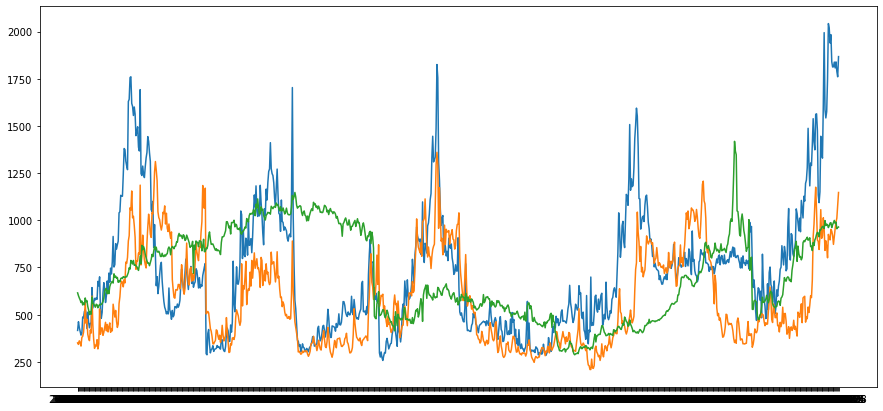

In [15]:

fig, ax = plt.subplots(1,1,figsize=[15,7])
ax.plot(data['date'], data['배추_가격(원/kg)'])
ax.plot(data['date'], data['무_가격(원/kg)'])
ax.plot(data['date'], data['양파_가격(원/kg)'])
#ax.plot(data['date'][index], data['건고추_가격(원/kg)'][index])
plt.show()

### Correlation Matrix
최소한 샤인머스캇, 캠벨얼리같은 경우는 다른 작물들과 반대로 움직이는 경향이 있음

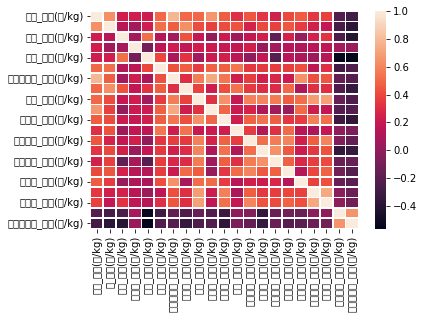

In [18]:
prices = data.iloc[:, 1::2].corr()
ax = sns.heatmap(prices, linewidth=0.5)
plt.show()
# 제 서버에 한글이 안깔려있어서 한글이 깨지네요